<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with PyTorch

## What is classification?

TK - image for classification

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo of is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy). |

Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch. 

In other words, taking a set of inputs and predicting what class those set of inputs belong to.




## TK - What we're going to cover

TK - include PyTorch workflow

TODO
* Simple classification (reiterate PyTorch workflow)
    * Binary classification
    * Multi-class classification
* Writing device agnostic code
    * Data on GPU
    * Model on GPU
* More advanced classification (e.g. black and white images or FashionMNIST or FoodMNIST or something)
* Visualizing a PyTorch model (all of the different connections)




## Where can can you get help?

All of the materials for this course [live on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

And if you run into trouble, you can ask a question on the [Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions) there too.

There's also the [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch. 



## TK - Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden layer activation | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| Loss function | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| Optimizer | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to gets hands-on with this setup throughout this notebook.

TK - image: architecture of a classification network

## TK - 1. Make classification data and get it ready

Let's begin by making some data.

We'll use the [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) method from Scikit-Learn to generate two clusters of moon shaped dots. 

In [2]:
from sklearn.datasets import make_moons

# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_moons(n_samples,
                  noise=0.07, # a little bit of noise to the dots
                  random_state=42) # keep random state so we get the same values

Alright, now let's view the first 5 `X` and `y` values.

In [6]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[-0.03341062  0.4213911 ]
 [ 0.99882703 -0.4428903 ]
 [ 0.88959204 -0.32784256]
 [ 0.34195829 -0.41768975]
 [-0.83853099  0.53237483]]

First 5 y labels:
[1 1 1 1 0]


Looks like there's two `X` values per one `y` value. 

Let's keep following the data explorer's motto of *visualize, visualize, visualize* and put them into a pandas DataFrame.

In [21]:
# Make DataFrame of moons
import pandas as pd
moons = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
moons.head(10)

,X1,X2,label
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0
5,0.599064,-0.289773,1
6,0.290090,-0.204688,1
7,-0.038269,0.459429,1
8,1.613771,-0.293970,1
9,0.693337,0.827819,0


It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

This tells us that our problem is **binary classification** since there's only two options (0 or 1).

How many values of each class is there?

In [10]:
# Check different labels
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

500 each, nice and balanced.

Let's plot them.

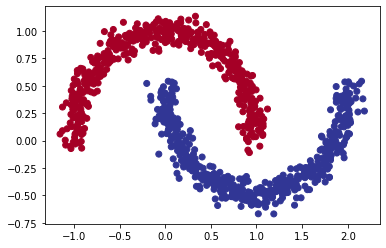

In [22]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

Alrighty, looks like we've got a problem to solve.

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).

> **Note:** This dataset is often what's considered a **toy problem** (a problem that's used to try and test things out on) in machine learning. 
> 
> But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

### TK - 1.1 Input and output shapes

One of the most common errors in deep learning is shape errors.

Mismatching the shapes of tensors and tensor operations with result in errors in your models.

We're going to see plenty of these throughout the course.

And there's no surefire way to making sure they won't happen, they will.

What you can do instead is continaully familiarize yourself with the shape of the data you're working with.

I like referring to it as input and output shapes.

Ask yourself:

"What shapes are my inputs and what shapes are my outputs?"

Let's find out.

In [25]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

Looks like we've got a match on the first dimension of each.

There's 1000 `X` and 1000 `y`. 

But what's the second dimension on `X`?

It often helps to view the values and shapes of a single sample (features and labels).

Doing so will help you understand what input and output shapes you'd be expecting from your model.

In [24]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.03341062  0.4213911 ] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


This tells us the second dimension for `X` means it has two features (vector) where as `y` has a single feature (scalar).

We have two inputs for one output.

### TK - 1.2 Turn data into tensors and create train and test splits

We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

Specifically, we'll need to:
1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between `X` and `y` and then evaluate those learned patterns on the test dataset).

In [26]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[-0.0334,  0.4214],
         [ 0.9988, -0.4429],
         [ 0.8896, -0.3278],
         [ 0.3420, -0.4177],
         [-0.8385,  0.5324]]), tensor([1., 1., 1., 1., 0.]))

Now our data is in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from Scikit-Learn.

We'll use `test_size=0.2` (80% training, 20% testing) and because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [27]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

Nice! Looks like we've now got 800 training samples and 200 testing samples.

## TK - 2. Building a model

UPTOHERE: building a model + creating training/eval loop etc

1. Construct the model
2. Setup loss and optimizer
3. Create training/eval loop

In [1]:
# Standard torch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

NameError: ignored

In [ ]:
from torch import nn
class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10) # TK - explain in and out features (could use TF playground for this)
        self.layer_2 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = MoonModelV0()
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# TODO, show case the same model with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

### TK - 2.1 Setup loss and optimizer

In [ ]:
# TK - Explain both of these - https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = Sigmoid built-in
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

## TK 3. Train model

In [ ]:
# TK - clean this up for different data types (could be far clearer what's going on)
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
    # 1. Forward pass
    y_pred = model_0(X_train).squeeze() # this won't work unless X & y are tensors
    
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_pred), y) # Using nn.BCELoss you need torch.sigmoid()
    loss = loss_fn(y_pred, y_train) # using nn.BCEWithLogitsLoss you *don't* need torch.sigmoid()
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=torch.round(torch.sigmoid(y_pred)))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test).squeeze()
        test_loss = loss_fn(test_pred, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=torch.round(torch.sigmoid(test_pred)))

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69343, Accuracy: 50.00% | Test loss: 0.67247, Test acc: 50.00%
Epoch: 10 | Loss: 0.53407, Accuracy: 78.38% | Test loss: 0.53940, Test acc: 76.50%
Epoch: 20 | Loss: 0.45563, Accuracy: 78.62% | Test loss: 0.47073, Test acc: 75.00%
Epoch: 30 | Loss: 0.40720, Accuracy: 80.50% | Test loss: 0.42620, Test acc: 76.50%
Epoch: 40 | Loss: 0.37457, Accuracy: 81.00% | Test loss: 0.39463, Test acc: 78.00%
Epoch: 50 | Loss: 0.35120, Accuracy: 82.38% | Test loss: 0.37088, Test acc: 79.50%
Epoch: 60 | Loss: 0.33356, Accuracy: 83.50% | Test loss: 0.35218, Test acc: 80.50%
Epoch: 70 | Loss: 0.31970, Accuracy: 83.75% | Test loss: 0.33694, Test acc: 82.00%
Epoch: 80 | Loss: 0.30848, Accuracy: 84.38% | Test loss: 0.32422, Test acc: 83.50%
Epoch: 90 | Loss: 0.29920, Accuracy: 85.00% | Test loss: 0.31344, Test acc: 83.50%


## TK - 4. Make predictions and evaluate the model

In [ ]:
import numpy as np
def plot_decision_boundary(model, X, y):
    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    X_test = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
    model.eval()
    with torch.inference_mode():
        y_preds = model(X_test)

    # Test for multi-class
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_preds, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_preds)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

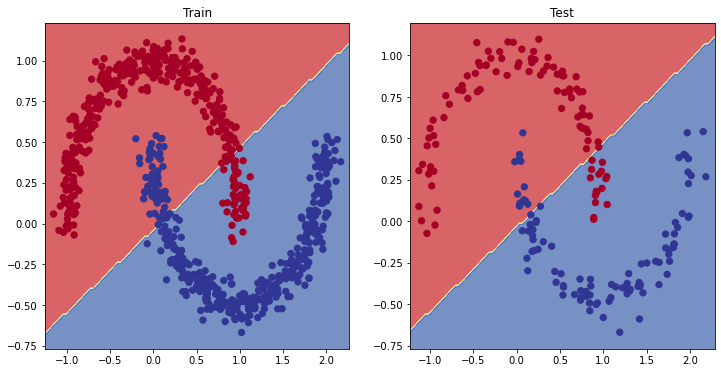

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## TK - 5. Improving a model

TODO
* Add layers 
* Add units
* Train for longer...


In [ ]:
class MoonModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = MoonModelV1()
model_1

MoonModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
epochs = 1000 # Train for longer
for epoch in range(epochs):
    # 1. Forward pass
    y_pred = model_1(X).squeeze()

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y_true=y, 
                      y_pred=torch.round(torch.sigmoid(y_pred)))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print outputs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}%")


Epoch: 0 | Loss: 0.71899, Accuracy: 32.30%
Epoch: 100 | Loss: 0.26747, Accuracy: 86.60%
Epoch: 200 | Loss: 0.24532, Accuracy: 88.60%
Epoch: 300 | Loss: 0.24452, Accuracy: 88.70%
Epoch: 400 | Loss: 0.24449, Accuracy: 88.60%
Epoch: 500 | Loss: 0.24449, Accuracy: 88.60%
Epoch: 600 | Loss: 0.24449, Accuracy: 88.60%
Epoch: 700 | Loss: 0.24449, Accuracy: 88.60%
Epoch: 800 | Loss: 0.24449, Accuracy: 88.60%
Epoch: 900 | Loss: 0.24449, Accuracy: 88.60%


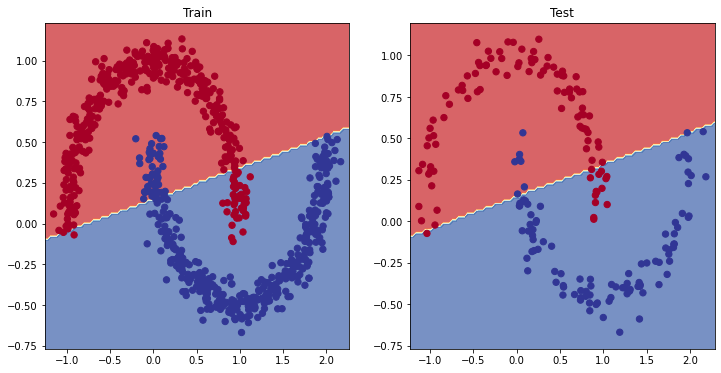

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Pretty good... but still not where we'd like it.

Our model is drawing straight lines... but we'd like the lines to be curved, what can we do? 

How about we check our model on linear data, what does that do?

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

# TK - change these variable names so they don't interfere with the original moons data

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], \
    y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], \
    y_regression[train_split:]

print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

40 40 10 10


In [ ]:
# TK - put this in helper function file... 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

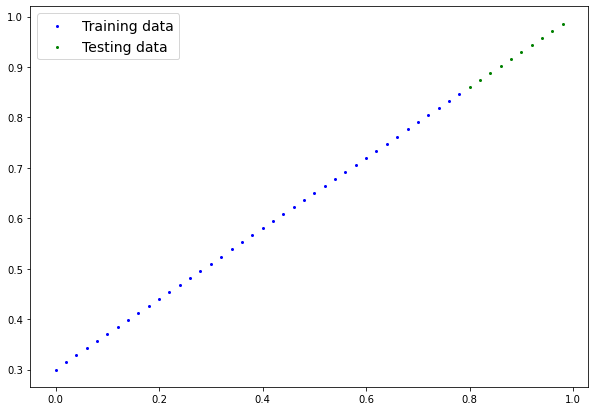

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.57614, Test loss: 0.47134
Epoch: 100 | Train loss: 0.09489, Test loss: 0.24817
Epoch: 200 | Train loss: 0.05440, Test loss: 0.14747
Epoch: 300 | Train loss: 0.06319, Test loss: 0.16150
Epoch: 400 | Train loss: 0.05353, Test loss: 0.13854
Epoch: 500 | Train loss: 0.06441, Test loss: 0.14258
Epoch: 600 | Train loss: 0.04558, Test loss: 0.11145
Epoch: 700 | Train loss: 0.05696, Test loss: 0.12189
Epoch: 800 | Train loss: 0.05632, Test loss: 0.11305
Epoch: 900 | Train loss: 0.05212, Test loss: 0.11977


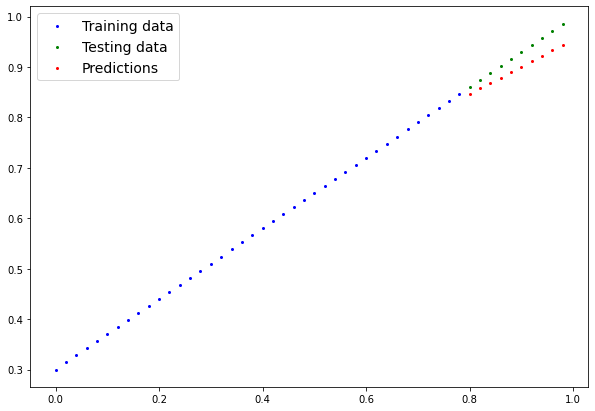

In [ ]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression, 
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression,
    predictions=y_preds.detach().numpy());

## TK - The missing piece: non-linearity

Our model can draw straight lines, thanks to its linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

Let's try.

In [ ]:
# Make data
from sklearn.datasets import make_moons

n_samples = 1000

X, y = make_moons(n_samples=1000,
    noise=0.15,
    random_state=42,
)

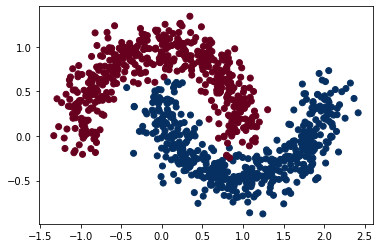

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 2.0915,  0.3245],
         [-1.1343,  0.4121],
         [-0.1784,  1.1279],
         [-0.0765,  0.9865],
         [ 0.3888, -0.1914]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
# Build model
from torch import nn
class MoonModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = MoonModelV2()
print(model_3)

MoonModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    # 1. Forward pass
    y_pred = model_3(X_train).squeeze()
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=torch.round(torch.sigmoid(y_pred)))
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}%")

Epoch: 0 | Loss: 0.69510, Accuracy: 38.00%
Epoch: 100 | Loss: 0.39819, Accuracy: 80.75%
Epoch: 200 | Loss: 0.26788, Accuracy: 88.12%
Epoch: 300 | Loss: 0.23489, Accuracy: 89.62%
Epoch: 400 | Loss: 0.20954, Accuracy: 90.38%
Epoch: 500 | Loss: 0.17689, Accuracy: 92.25%
Epoch: 600 | Loss: 0.14114, Accuracy: 94.62%
Epoch: 700 | Loss: 0.10946, Accuracy: 96.88%
Epoch: 800 | Loss: 0.08692, Accuracy: 97.62%
Epoch: 900 | Loss: 0.07172, Accuracy: 97.75%


In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

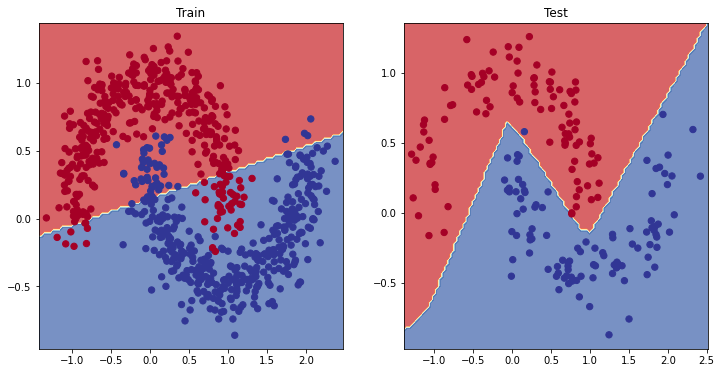

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## TK - Putting things together by building a multi-class PyTorch model

TK - what is a multi-class model?

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


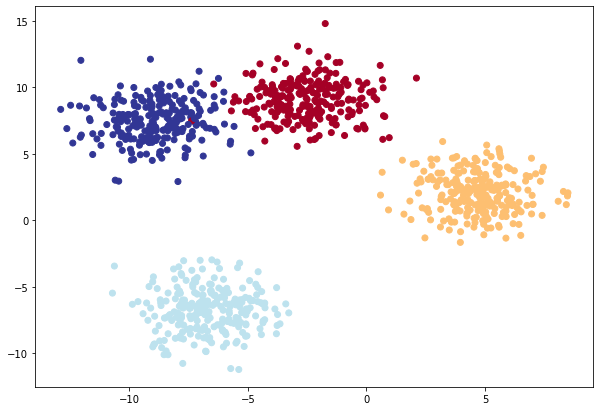

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

# Turn into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

TODO: **Question:** Does this dataset need non-linearity? Or could you draw a succession of straight lines to separate it?

In [ ]:
from torch import nn
# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8) # doesn't work with 1, try a different value
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

TODO: Explain different loss options for multi-class and binary classification

In [ ]:
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
    # 1. Forward pass
    y_pred = model_4(X_blob_train)

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_pred, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Accuracy: 65.50%
Epoch: 10 | Loss: 0.14398, Accuracy: 99.12%
Epoch: 20 | Loss: 0.08062, Accuracy: 99.12%
Epoch: 30 | Loss: 0.05924, Accuracy: 99.12%
Epoch: 40 | Loss: 0.04892, Accuracy: 99.00%
Epoch: 50 | Loss: 0.04295, Accuracy: 99.00%
Epoch: 60 | Loss: 0.03910, Accuracy: 99.00%
Epoch: 70 | Loss: 0.03643, Accuracy: 99.00%
Epoch: 80 | Loss: 0.03448, Accuracy: 99.00%
Epoch: 90 | Loss: 0.03300, Accuracy: 99.12%


In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_preds = model_4(X_blob_test)

In [ ]:
# TODO: Show the outputs of the model - what do these mean?
y_preds[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [ ]:
# TODO: Softmax = obtain probabilities, no softmax = logits from model
print(torch.softmax(y_preds, dim=1).argmax(dim=1)[:10], y_preds.argmax(dim=1)[:10])
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds.argmax(dim=1))}%")

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]) tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


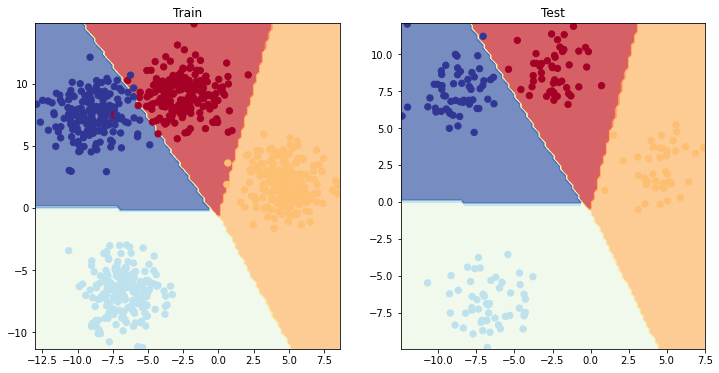

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## TODO: Exercises



## TK - Exercises

* Build a model to fit the spirals data from CS231n - https://cs231n.github.io/neural-networks-case-study/

```python
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

## TODO: Extra-curriculum

* Spend 10-minutes reading the [Wikipedia page for different activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions), how many of these can you line up with [PyTorch's activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)?

## TODO
* ~~Multiclass model~~
* ~~device agnostic code: GPU model~~ - not doing this due to complications with plotting code, will do it with more advanced modules
* ~~Fixed data inputs (e.g. calc on tensors when need to calc on tensors)~~
* ~~Merge the functions so `plot_decision_boundary` works on multi-class~~
* ~~Introduce non-linearity (the missing piece!) - straight lines and non-straight lines~~
* Make evaluation functions better - teach someone about different evaluation functions for a classification model
* Make sure notebook runs from top to bottom
* Make sure each section can be run individually - all imports should be where they need to be 
* Create helper_functions.py script for different helper functions throughout the course